## Step:- 1 Importing libraries...

In [94]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Step:- 2 importing Dataset

In [96]:
data=pd.read_csv('Titanic dataset.csv')

## Step:- 3 Exploring the Dataset

In [97]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [98]:
data.size

10692

In [99]:
data.shape
print("Rows :-",data.shape[0])
print("Columns :-",data.shape[1])

Rows :- 891
Columns :- 12


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
# Embarked,age and cabin have missing value

In [102]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
# here there are possibilties in outliuer in age and fare columns

In [104]:
data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


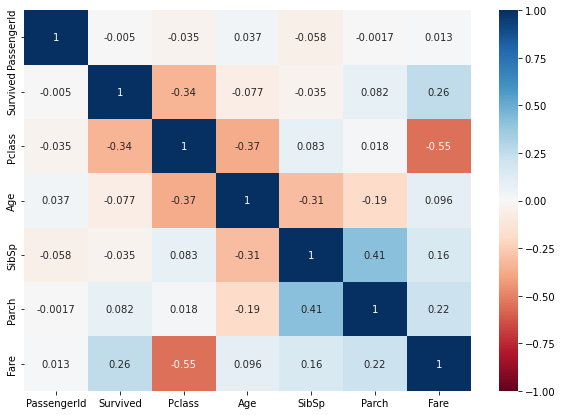

In [105]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap="RdBu",annot=True)
plt.show()

In [106]:
# target value=Survived

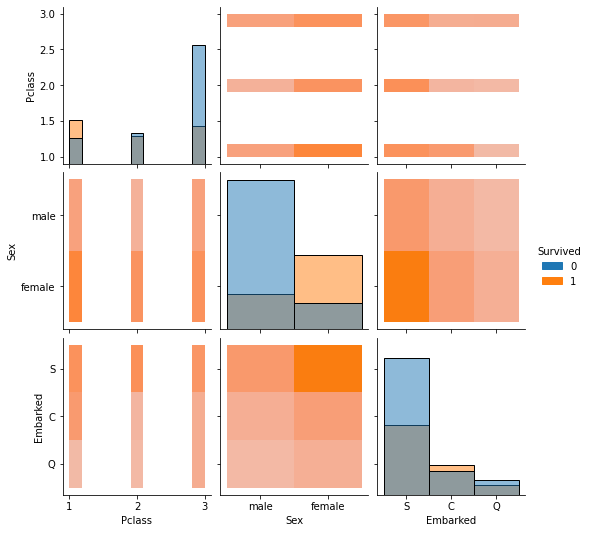

In [107]:
sns.pairplot(vars=['Pclass','Sex','Embarked'],kind='hist',hue='Survived',data=data)
plt.show()

## Step:- 4  Data Analysis

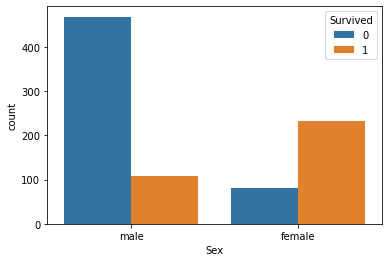

In [108]:
sns.countplot(data['Sex'],hue=data['Survived'])
plt.show()

In [109]:
data_sex=data.groupby(by=["Sex","Survived"])['Survived'].count()
type(data_sex)
data_sex

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [110]:
print("Male survived %.2f%%"%((data_sex['male'][1]/(data_sex['male'][1]+data_sex['male'][0])*100)))
print("Female survived %.2f%%"%((data_sex['female'][1]/(data_sex['female'][1]+data_sex['female'][0])*100)))

Male survived 18.89%
Female survived 74.20%


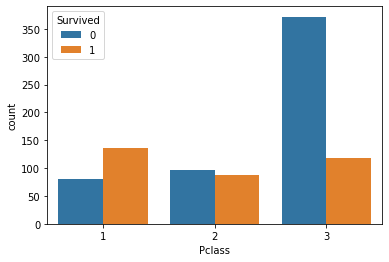

In [111]:
sns.countplot(data['Pclass'],hue=data['Survived'],orient="v")
plt.show()

In [112]:
data_class=data.groupby(by=["Pclass",'Survived'])['Survived'].count()

data_class

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [113]:
print("First  class survived :- %.2f%%"%((data_class[1][1]/(data_class[1][1]+data_class[1][0])*100)))
print("Second class survived :- %.2f%%"%((data_class[2][1]/(data_class[2][1]+data_class[2][0])*100)))
print("Third  class survived :- %.2f%%"%((data_class[3][1]/(data_class[3][1]+data_class[3][0])*100)))


First  class survived :- 62.96%
Second class survived :- 47.28%
Third  class survived :- 24.24%


In [114]:
def age_category(age):
    if age<=12:
        return 'Children'
    elif 12<age<=18:
        return 'Teenage'
    elif 18<age<=30:
        return 'Youth'
    elif 30<age<=45:
        return 'Midage'
    elif 35<age<=60:
        return 'Oldage'
    else:
        return 'Seniors'

In [115]:
data['AgeCategory']=data['Age'].apply(age_category)

In [116]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Midage
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Midage


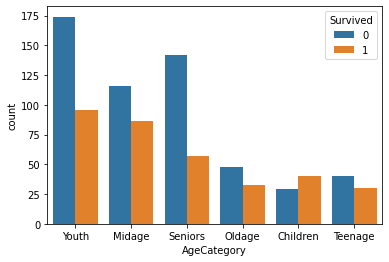

In [117]:
sns.countplot(data['AgeCategory'],hue=data['Survived'])
plt.show()

In [118]:
observed=pd.crosstab(data['AgeCategory'],data['Survived'])
observed

Survived,0,1
AgeCategory,,
Children,29,40
Midage,116,86
Oldage,48,33
Seniors,142,57
Teenage,40,30
Youth,174,96


In [119]:
from scipy.stats import chi2_contingency

# H0: The Survived column independent of age category
# H1:The Survived column dependent of age category
chi,p,dof,expected=chi2_contingency(observed)
print('CHI value: ',chi)
print('P_VALUE: ',p)
if(p<0.05):
    print()
    print('Accept the H1 (i.e, The Survived column dependent of age category )')
else:
    print("Accept the H0")
    
dof

CHI value:  22.371876386576556
P_VALUE:  0.00044486673473075885

Accept the H1 (i.e, The Survived column dependent of age category )


5

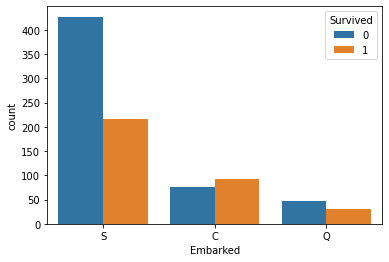

In [120]:
sns.countplot(data['Embarked'],hue=data['Survived'])
plt.show()

In [121]:
# Does the survive depend Fair  price  ???

In [122]:
fare_surv=data[data['Survived']==1]['Fare']
fare_notsurv=data[data['Survived']==0]['Fare']
print(fare_surv)
fare_notsurv

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64


0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64

In [123]:
from statsmodels.stats.weightstats import ztest

In [124]:
# H0-here is no difference in fare of surv and fare of  not surv
# H1- the survival depend on fare price

z_score,p_value=ztest(fare_surv,fare_notsurv)
print('Z_SCORE: ',z_score)
print('P_VALUE: ',p_value)
if(p_value<0.05):
    print('Accept the H1 i.e, the survival depend on fare price')
else:
    print("Accept the H0")
   

Z_SCORE:  7.939191660871055
P_VALUE:  2.035031103573989e-15
Accept the H1 i.e, the survival depend on fare price


Data Analysis Conclusion:-

1) The survival rate of Female passengers is higher as compared to male passengers (females were given priority while rescue)

2) The survival rate of passengers from 1st class was highest. (The passengers from 1st and 2 second class were given priority while rescue)

3) Children, teenagers and senior citizens were given priority while rescue.

4) Although the survival rate for passengers boarded from Chebourge was the highest while there were more number of passengers from southampton we cannot say that was any priority on the basis of boarding station.

# Step:-5 Data Preprocessing

In [125]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
AgeCategory     0.000000
dtype: float64

In [126]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Seniors


In [132]:
data.groupby(by=['Pclass','Embarked'])['Fare'].median()[1]

Embarked
C    78.2667
Q    90.0000
S    52.0000
Name: Fare, dtype: float64

In [57]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [58]:
data['Embarked']=np.where(data['Embarked'].isnull(),'C',data['Embarked'])

In [59]:
data.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,Seniors


In [60]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Seniors
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Seniors
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Seniors
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Seniors
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Seniors
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Seniors
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Seniors
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Seniors


In [133]:
med=data['Age'].median()
med

28.0

In [62]:
data['Age'].fillna(med,inplace=True)

In [63]:
data['Age'].isnull().sum()

0

In [64]:
# We need to drop the cabin column bcoz of 77% data is missing

In [65]:
data.drop(columns='Cabin',inplace=True)

In [135]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Detecting and treating outliers

<AxesSubplot:xlabel='Age'>

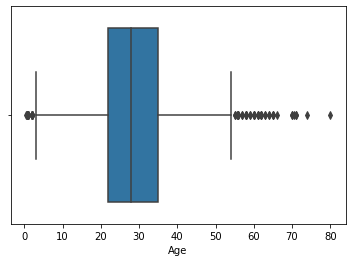

In [66]:
sns.boxplot(data['Age'])

In [67]:
data[data['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,Seniors
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,Seniors
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,Seniors
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,Seniors
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S,Seniors


In [68]:
data[data['AgeCategory']=='Seniors']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Seniors
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,S,Seniors
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,C,Seniors
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,C,Seniors
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Q,Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,C,Seniors
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,S,Seniors
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,S,Seniors
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,S,Seniors


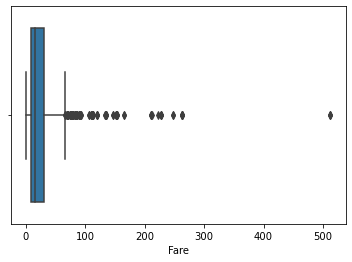

In [69]:
sns.boxplot(data['Fare'])
plt.show()

In [70]:
data[data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Midage
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Midage
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Midage


In [71]:
# we will cap the outliers in fare to 95th percentile
np.percentile(data['Fare'],95)

112.07915

In [137]:
UL=np.percentile(data['Fare'],95)
UL

112.07915

In [73]:
data['Fare']=np.where(data['Fare']>UL,UL,data['Fare'])

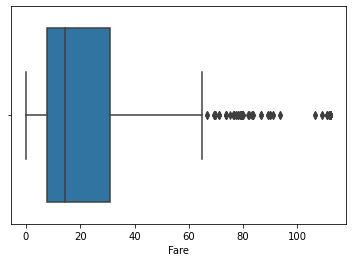

In [74]:
sns.boxplot(data['Fare'])
plt.show()

### Feature Selection

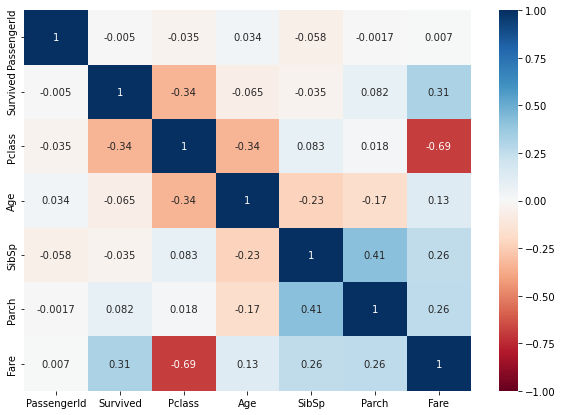

In [75]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap="RdBu",annot=True)
plt.show()

In [76]:
# To avoid multicollinaerrty we will remove plcass columns

In [140]:
data.drop(columns=['PassengerId','Pclass','Name','Ticket','AgeCategory'],inplace=True)

In [141]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,1,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,0,male,35.0,0,0,8.0500,NaN,S


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


## Feature Engineering

In [143]:
data=pd.get_dummies(data,drop_first=True)

In [144]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc=StandardScaler()

In [83]:
data_s=sc.fit_transform(data)

In [84]:
data_s

array([[-0.78927234, -0.56573646,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [ 1.2669898 ,  0.66386103,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 1.2669898 , -0.25833709, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [-0.78927234, -0.1046374 ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [ 1.2669898 , -0.25833709, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [-0.78927234,  0.20276197, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

In [85]:
df=pd.DataFrame(data_s,columns=data.columns)
df

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.789272,-0.565736,0.432793,-0.473674,-0.700836,0.737695,-0.307562,0.619306
1,1.266990,0.663861,0.432793,-0.473674,1.491434,-1.355574,-0.307562,-1.614710
2,1.266990,-0.258337,-0.474545,-0.473674,-0.677726,-1.355574,-0.307562,0.619306
3,1.266990,0.433312,0.432793,-0.473674,0.868903,-1.355574,-0.307562,0.619306
4,-0.789272,0.433312,-0.474545,-0.473674,-0.673447,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.789272,-0.181487,-0.474545,-0.473674,-0.503976,0.737695,-0.307562,0.619306
887,1.266990,-0.796286,-0.474545,-0.473674,0.078042,-1.355574,-0.307562,0.619306
888,-0.789272,-0.104637,0.432793,2.008933,-0.146206,-1.355574,-0.307562,0.619306
889,1.266990,-0.258337,-0.474545,-0.473674,0.078042,0.737695,-0.307562,-1.614710


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB
